In [1]:
# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_state_hinton
from qiskit.visualization import plot_bloch_multivector

provider = IBMQ.load_account()

# Backend overview
import qiskit.tools.jupyter

from qiskit.tools.monitor import backend_overview, backend_monitor

# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

import matplotlib.pyplot as plt
%matplotlib inline

import math as m
import numpy

backend_statevector = Aer.get_backend('statevector_simulator')
backend_qasm_sim = Aer.get_backend("qasm_simulator")

# Projeto - Grupo 12
- Anabela Pereira, a87990
- André Gonçalves, a87942


Neste trabalho realizado no âmbito da unidade curricular de Interação e Concorrência foi nos proposto encontrar um número numa lista de oito elementos. No nosso caso, grupo número 12 modulo 8 é 4.

Para ser mais simples e não estarmos a repetir código frequentemente , definimos logo no início uma função para desenhar as esferas, uma função para fazer as matrizes, uma função para invocar as funções de cima e por último uma função para desenhar os histogramas, respetivamente.

In [2]:
def get_psi(circuit):

    result = execute(circuit, backend_statevector).result()
    psi = result.get_statevector(circuit)
    display(plot_bloch_multivector(psi))
    
def print_unitary(circuit):
   
    backend = Aer.get_backend('unitary_simulator') 
    unit=execute(circuit, backend).result().get_unitary(circuit)
    #print(unit)
    print(unit.real)
    
def display_circuit(circuit,disp,psi,unitary):
    if disp:
        display(circuit.draw(output="mpl"))
    if psi:
        get_psi(circuit)
    if unitary:
        print_unitary(circuit)
        
def display_results(counts_sim):
    return plot_histogram(counts_sim)

def display_counts(circuit, shots):

    result = execute(circuit, backend_qasm_sim, shots=shots).result()
    counts_sim = result.get_counts(circuit)
    return counts_sim



Tomemos então N=4 numa lista não ordenada. Para tal usamos o algoritmo de Grover.

### Algoritmo de Grover

O algoritmo de Grover permite encontrar um número $N$ numa lista não ordenada de $n$ elementos.

Os passos do algoritmo são:
1. Inicializar o circuito com todos os estados possíveis com a mesma amplitude.
$$
\lvert s \rangle = \frac{1}{\sqrt n} \sum_{x=0}^{n-1} \lvert x \rangle
$$

2. Repetir os seguintes passos $\sqrt n$ vezes:
    1. Aplicar o oráculo $U_w$
    2. Aplicar o difusor $U_D$

3. Medir os estados quânticos resultantes


#### Oráculo $U_w$
O óráculo vai inverter o sinal do número que estámos á procura. Se estamos á procura de $w$ então
$$
U_w \lvert w \rangle = -\lvert w \rangle\\
U_w \lvert \psi \rangle = \lvert \psi \rangle, \psi \neq w
$$

#### Difusor $U_D$
O difusor vai inverter de novo o sinal do número que estámos á procura e aumentar a sua amplitude.
$$
U_D = 2\lvert a \rangle \langle a \lvert -I\\
\lvert a \rangle = H^{\oplus n}\lvert 0 \rangle^{\oplus n}
$$

### Implementação
Queremos procurar $N = 4$ numa lista não ordenada de $2^3=8$ elementos então o nosso circuito terá 3 qubits.

Como $4 = 100$ queremos um oráculo $U_4$ tal que 
$$
U_4 \lvert 100 \rangle = -\lvert 100 \rangle\\
U_4 \lvert \psi \rangle = \lvert \psi \rangle, \psi \neq 100
$$

$U_4$ corresponde à matriz
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & -1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

Como sabemos que o seguinte circuito corresponde á matriz
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -1
\end{bmatrix}
$$

conseguimos chegar ao oráculo que queremos.

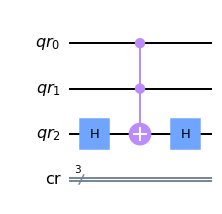

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.01465364e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.01465364e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.01465364e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.99673462e-16]
 [ 1.01465364e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.01465364e-17  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.01465364e-17  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.79380389e-16
   

In [3]:
qr=QuantumRegister(3,'qr')
cr=ClassicalRegister(3,'cr')
qc= QuantumCircuit(qr, cr)

qc.h(qr[2])
qc.ccx(qr[0],qr[1],qr[2])
qc.h(qr[2])

display_circuit(qc,True,False,True)

Este circuito segue o seguinte esquema:
$\lvert 111 \rangle \mapsto -\lvert 111 \rangle$ e $\lvert \psi \rangle \mapsto \lvert \psi \rangle$, $\psi \neq 111$.

Para chegar ao oráculo que precissámos colocamos gates $X$ nos qubits $0$ e $1$ antes assim o novo circuito faz $\lvert 100 \rangle \mapsto -\lvert 111 \rangle$ e $\lvert \psi \rangle \mapsto \lvert \psi \rangle$, $\psi \neq 100$ então colocamos gates $X$ nos qubits $0$ e $1$ também depois e assim obtemos $\lvert 100 \rangle \mapsto -\lvert 100 \rangle$ e $\lvert \psi \rangle \mapsto \lvert \psi \rangle$, $\psi \neq 100$, que é o que queremos.

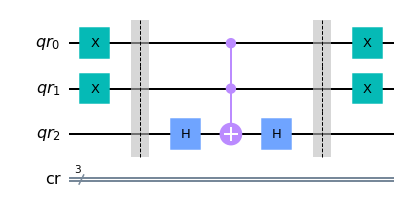

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.99673462e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.01465364e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.01465364e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.01465364e-17]
 [-1.79380389e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.01465364e-17  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.01465364e-17  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.01465364e-17
   

In [4]:
qr=QuantumRegister(3,'qr')
cr=ClassicalRegister(3,'cr')
qc= QuantumCircuit(qr, cr)

qc.x(qr[:2])
qc.barrier()

qc.h(qr[2])
qc.ccx(qr[0],qr[1],qr[2])
qc.h(qr[2])

qc.barrier()
qc.x(qr[:2])

display_circuit(qc,True,False,True)

O nosso difusor será $U_D = H^{\oplus 3}(-2\lvert 000 \rangle \langle 000 \lvert + I)H^{\oplus 3} = -H^{\oplus 3}(2\lvert 000 \rangle \langle 000 \lvert - I)H^{\oplus 3}$ que equivale ao seguinte circuito:

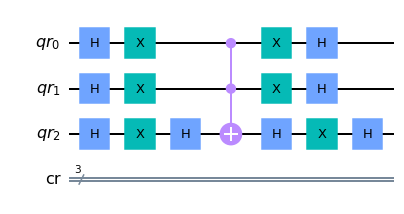

[[ 0.75 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25]
 [-0.25  0.75 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25]
 [-0.25 -0.25  0.75 -0.25 -0.25 -0.25 -0.25 -0.25]
 [-0.25 -0.25 -0.25  0.75 -0.25 -0.25 -0.25 -0.25]
 [-0.25 -0.25 -0.25 -0.25  0.75 -0.25 -0.25 -0.25]
 [-0.25 -0.25 -0.25 -0.25 -0.25  0.75 -0.25 -0.25]
 [-0.25 -0.25 -0.25 -0.25 -0.25 -0.25  0.75 -0.25]
 [-0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25  0.75]]


In [5]:
qr=QuantumRegister(3,'qr')
cr=ClassicalRegister(3,'cr')
qc= QuantumCircuit(qr, cr)

qc.h(qr)
qc.x(qr)
qc.h(qr[2])
qc.ccx(qr[0],qr[1],qr[2])
qc.h(qr[2])
qc.x(qr)
qc.h(qr)

display_circuit(qc,True,False,True)

### Implementação no Qiskit

Somos o grupo 12, portanto, o nosso $N$ é $4 = 12 \mod 8$, que em binário é '100'.

Começamos por criar uma função que cria um circuito com $n$ qubits:

In [6]:
def create_circuit(n):
    qr=QuantumRegister(n,'qr')
    cr=ClassicalRegister(n,'cr')
    qc= QuantumCircuit(qr, cr)
    return qr,cr,qc

De seguida, uma função que inizializa os qubits na superposition aplicando Haddamard gates a cada qubit. 

In [7]:
def init():
    qc.h(qr)
    qc.barrier()

Vamos agora criar um oráculo de mudança de fase.

In [8]:
def oraculo():
    
    qc.x(qr[:2])
    
    qc.h(qr[2])
    qc.ccx(qr[0],qr[1],qr[2])
    qc.h(qr[2])    
    
    qc.x(qr[:2])
    
    qc.barrier()

Após a criação do oráculo é necessário fazer a amplificação, por isso criamos o diffusor.

In [9]:
def diffusor():
    
    qc.h(qr)
    qc.x(qr)
    qc.h(qr[2])
    qc.ccx(qr[0],qr[1],qr[2])
    qc.h(qr[2])
    qc.x(qr)
    qc.h(qr)
    
    qc.barrier()

Começemos agora por aplicar o algoritmo. Criamos um circuito com 3 qubits.

In [10]:
qr,cr,qc = create_circuit(3)

Após a criação do circuito iniciamos o mesmo na superposição.

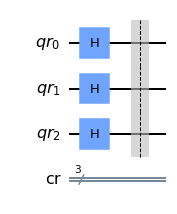

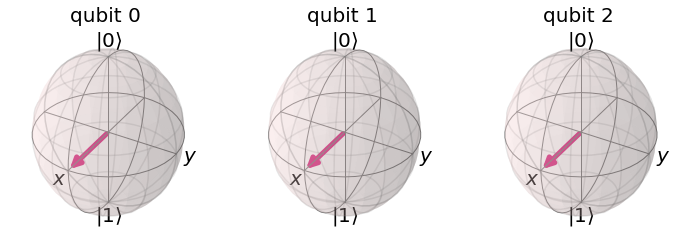

In [11]:
init()
display_circuit(qc,True,True,False)

De seguida aplicamos o oráculo.

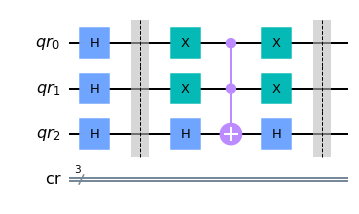

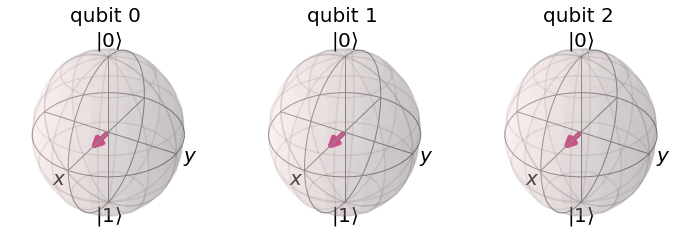

In [12]:
oraculo()
display_circuit(qc,True,True,False)

Depois aplicamos o difusor.

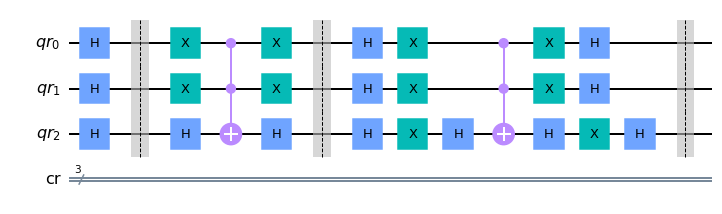

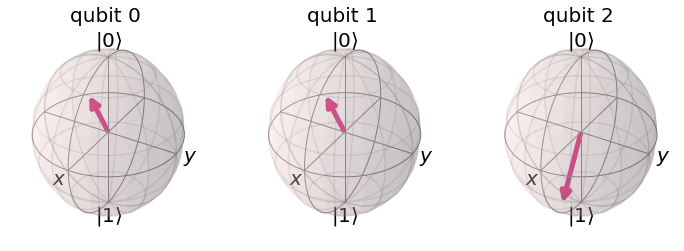

In [13]:
diffusor()
display_circuit(qc,True,True,False)

Como já fizemos uma iteração e vamos medir para ver o resultado em bits.

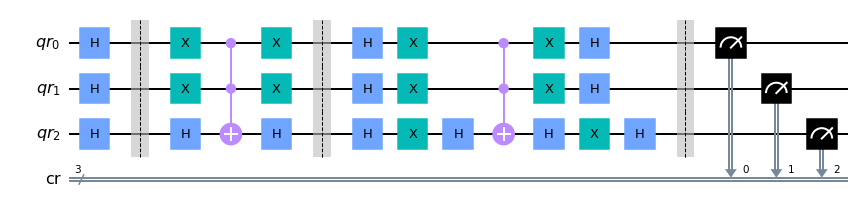

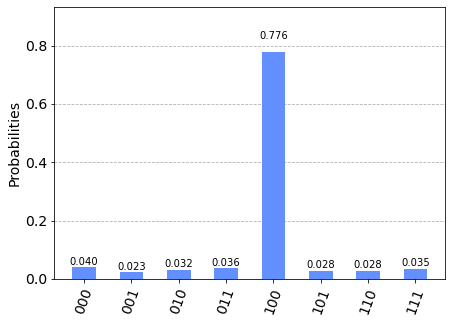

In [14]:
qc.measure(qr, cr)
display_circuit(qc,True,False,False)
counts_sim = display_counts(qc, 1024)
display_results(counts_sim)

Observámos que obtivemos o resultado esperado com apenas 1 iteração. Como sabemos devemos fazer $\sqrt n$ iterações, vamos fazer agora 2 iterações.

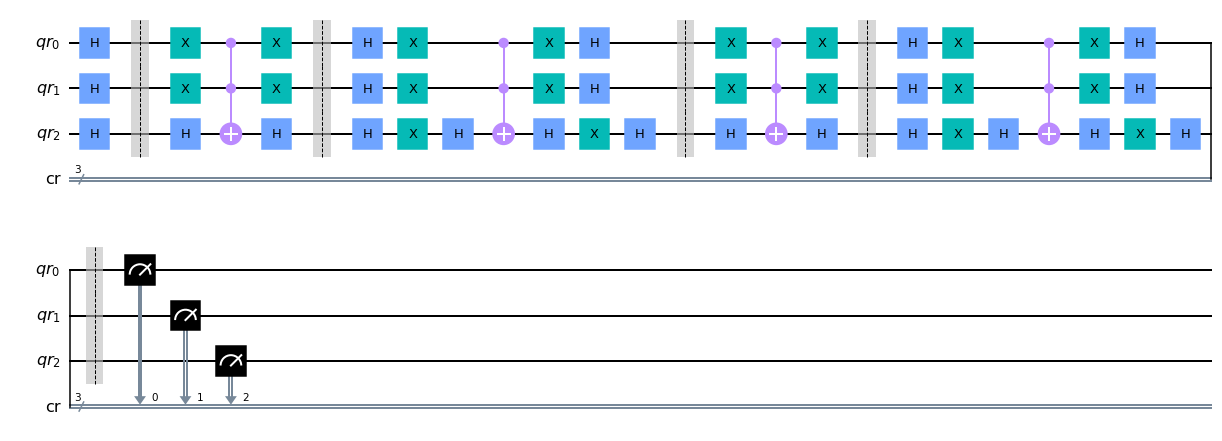

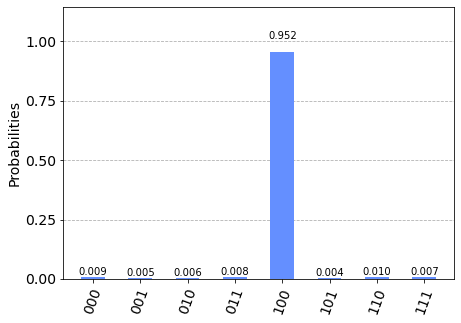

In [15]:
qr,cr,qc = create_circuit(3)

init()
for i in range(2):
    oraculo()
    diffusor()
    
qc.measure(qr,cr)
display_circuit(qc,True,False,False)
counts_sim = display_counts(qc, 1024)
display_results(counts_sim)

### Simulação com ruído

In [16]:
from qiskit.providers.aer.noise import NoiseModel
import qiskit.providers.aer.noise

In [17]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [18]:
backend_device = provider.get_backend('ibmq_santiago')
coupling_map = backend_device.configuration().coupling_map
# Construct the noise model from backend properties
noise_model = NoiseModel.from_backend(backend_device)
basis_gates = noise_model.basis_gates

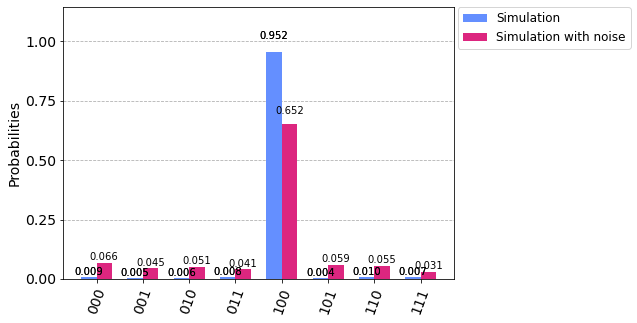

In [19]:
result_noise = execute(qc, backend_qasm_sim,shots = 1024, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(qc)

plot_histogram([counts_sim, counts_noise], legend=[ "Simulation", "Simulation with noise" ])

In [20]:
print(counts_sim)

{'101': 4, '001': 5, '110': 10, '100': 975, '010': 6, '000': 9, '011': 8, '111': 7}


In [21]:
print(counts_noise)

{'101': 60, '010': 52, '110': 56, '100': 668, '111': 32, '000': 68, '011': 42, '001': 46}


In [22]:
def resume(counts_raw):
    s0=s1=0
    k=counts_raw.keys()
    lk=list(k)
    for c in lk:
        if c[0]=='0':
            s0 = s0 + counts_raw.get(c)
        else:
            s1 = s1 + counts_raw.get(c)
    return({'0':s0, '1':s1})

In [23]:
cn = resume(counts_noise)
print(cn)

{'0': 208, '1': 816}


In [24]:
c = resume(counts_sim)
print(c)

{'0': 28, '1': 996}


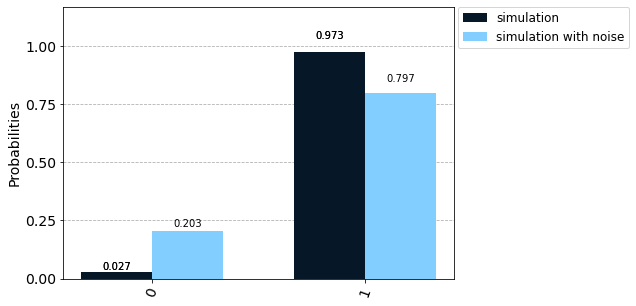

In [25]:
plot_histogram([c,cn], legend= ['simulation','simulation with noise'], color=['#061727','#82cfff'])

### Num computador quântico

In [26]:
%qiskit_backend_overview

Vamos agora correr o circuito num computador quântico. Vamos utilizar ibmq_belem.

In [28]:
backend_device = provider.get_backend('ibmq_belem')
print("Running on:", backend_device)

Running on: ibmq_belem


In [29]:
backend_device

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
job_r = execute(qc, backend_device, shots=1024)

jobID_r = job_r.job_id()

print('JOB ID: {}'.format(jobID_r))

JOB ID: 60bd1e4625cc6e024d65d716


In [31]:
job_get=backend_device.retrieve_job("60bd1e4625cc6e024d65d716")

result_r = job_get.result()
counts_run = result_r.get_counts(qc)

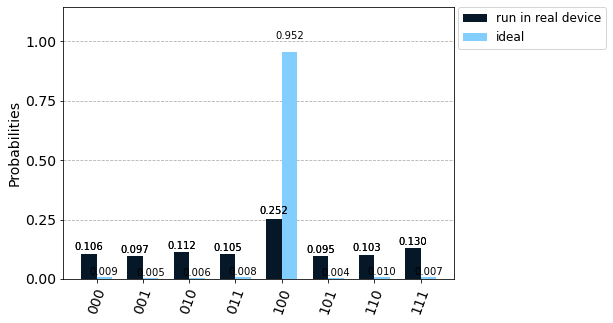

In [32]:
#result = execute(qc, Aer.get_backend("qasm_simulator"), shots=1024).result()
#counts_sim = result.get_counts(qc)

plot_histogram([counts_run, counts_sim ], legend=[ 'run in real device', 'ideal'], color=['#061727','#82cfff'])

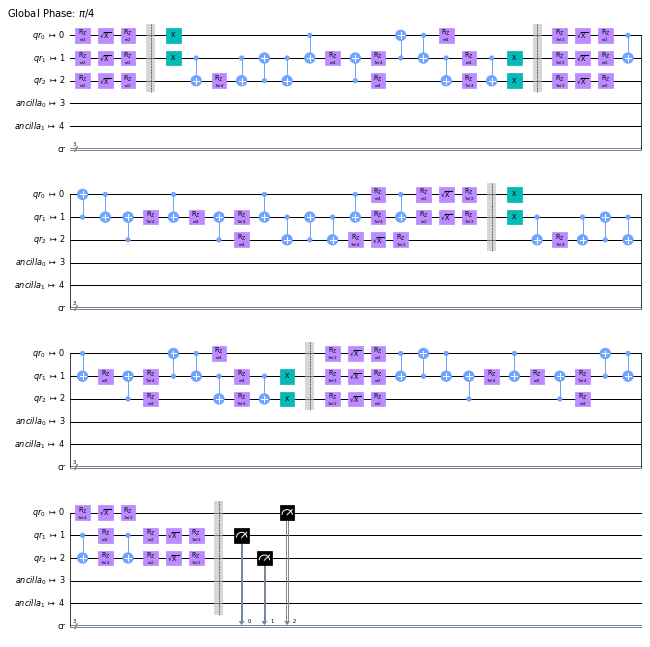

In [33]:
qc_real = transpile(qc, backend=backend_device)
qc_real.draw(output='mpl', scale=0.5)

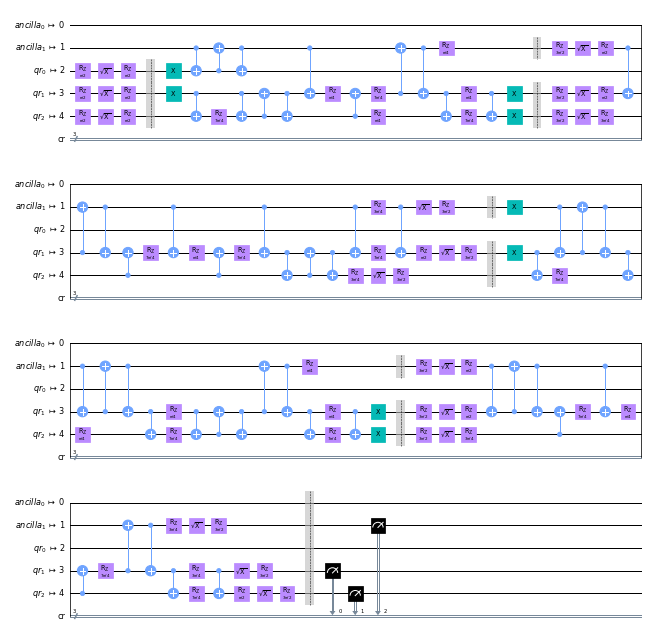

In [34]:
qc_otimizado = transpile(qc, backend=backend_device, optimization_level=2)
qc_otimizado.draw(output='mpl', scale=0.5)

In [35]:
qc_real.depth()

78

In [36]:
qc_otimizado.depth()

82

In [37]:
job_exp = execute(qc_otimizado, backend_device, shots = 1024)

# job_id allows you to retrive old jobs
jobID = job_exp.job_id()

print('JOB ID: {}'.format(jobID))

job_exp.result().get_counts(qc_otimizado)

JOB ID: 60bd1e6043987e233ff11556


{'000': 134,
 '001': 79,
 '010': 87,
 '011': 61,
 '100': 440,
 '101': 86,
 '110': 83,
 '111': 54}

In [38]:
#with optimization 2
job_get_o=backend_device.retrieve_job("60bd1e6043987e233ff11556")

result_real_o = job_get_o.result(timeout=3600, wait=5)

counts_opt = result_real_o.get_counts(qc_otimizado)

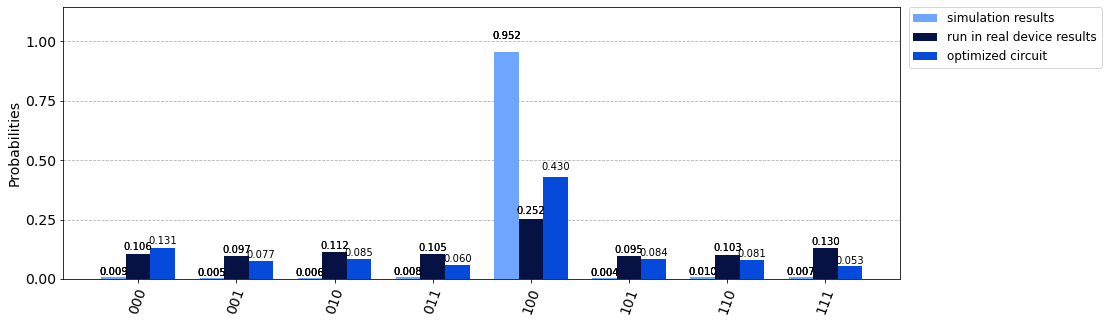

In [39]:
legend = [ 'simulation results','run in real device results', 'optimized circuit']
color = ['#6ea6ff','#051243','#054ada']

plot_histogram([counts_sim, counts_run, counts_opt], legend = legend, color=color, figsize=(15, 5))

### Mitigação de erros com IGNIS

In [40]:
meas_calibs, state_labels = complete_meas_cal(qubit_list=range(3), qr=qr, circlabel='mcal')

In [41]:
job_ignis = execute(meas_calibs, backend=backend_device, shots=1024)

jobID_run_ignis = job_ignis.job_id()

print('JOB ID: {}'.format(jobID_run_ignis))

JOB ID: 60bd1e8325cc6e17cd65d71b


In [42]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [43]:
job_get=backend_device.retrieve_job("60bd1e8325cc6e17cd65d71b")

cal_results = job_get.result()

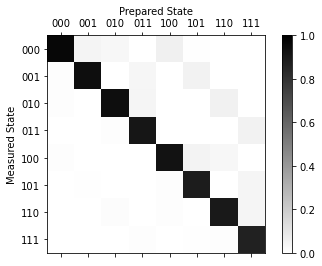

In [44]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')

# Plot the calibration matrix
meas_fitter.plot_calibration()

In [45]:
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

Average Measurement Fidelity: 0.917603


Aplicamos um filtro baseado na matriz de calibração. 

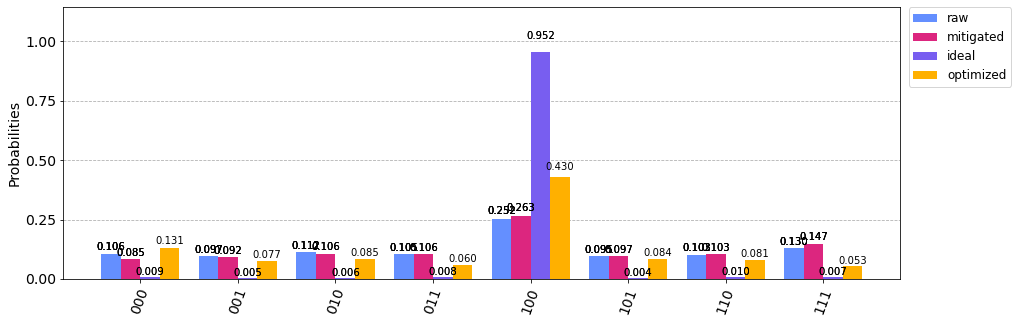

In [46]:
# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(result_r)
mitigated_counts = mitigated_results.get_counts()

plot_histogram([counts_run, mitigated_counts, counts_sim, counts_opt], legend=['raw', 'mitigated', 'ideal', 'optimized'], figsize=(15,5))

In [47]:
%qiskit_version_table